In [1]:
import pandas as pd
import numpy as np

In [2]:
import glob 

In [3]:
nosmile  = glob.glob(r"C:\Users\acer\Downloads\Image\non_smile\*.jpg")
smile = glob.glob(r"C:\Users\acer\Downloads\Image\smile\*.jpg")
test = glob.glob(r"C:\Users\acer\Downloads\Image\test\*.jpg")

In [4]:
len(nosmile),len(smile),len(test)

(603, 600, 12030)

In [5]:
from PIL import Image

In [6]:
img23 = Image.open(nosmile[34])

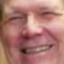

In [7]:
img23 = Image.open(smile[1])
img23

In [8]:
img23.size

(64, 64)

In [9]:
img23 = img23.convert("L")

In [10]:
pixarr = np.array(img23)
pixarr

array([[ 94, 100, 103, ..., 190, 175, 162],
       [ 95,  99, 102, ..., 192, 178, 165],
       [ 93,  97, 100, ..., 196, 182, 169],
       ...,
       [145, 151, 154, ..., 153, 151, 148],
       [144, 153, 155, ..., 156, 152, 146],
       [143, 154, 157, ..., 158, 153, 146]], dtype=uint8)

In [11]:
import matplotlib.pyplot as plt

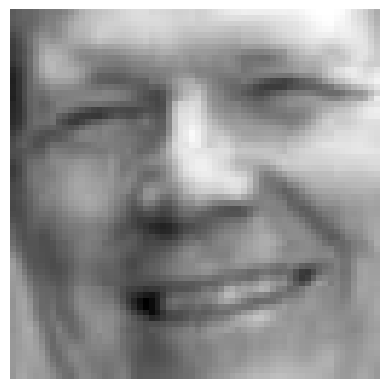

In [12]:
plt.imshow(pixarr,cmap="gray")
plt.axis("off")  # Hide axes
plt.show()

In [13]:
data = []
label = []

In [14]:
for image in nosmile:
    img = Image.open(image)
    img = img.convert("L")
    img = img.resize((64, 64))
    img = np.array(img).flatten()
    data.append(img)
    label.append(0)

In [15]:
for image in smile:
    img = Image.open(image)
    img = img.convert("L")
    img = img.resize((64, 64))
    img = np.array(img).flatten()
    data.append(img)
    label.append(1)

In [16]:
len(data),len(label)


(1203, 1203)

In [17]:
x = np.array(data)
x.shape

(1203, 4096)

In [18]:
y = np.array(label)
y.shape

(1203,)

In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3,random_state=0,shuffle=True)

In [20]:
xtrain.shape , xtest.shape,ytrain.shape,ytest.shape

((842, 4096), (361, 4096), (842,), (361,))

In [21]:
xtrain[56]

array([ 70,  71,  72, ..., 153, 150, 147], dtype=uint8)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [23]:

scaler = StandardScaler()
scaler.fit(xtrain)  
xtrainscale = scaler.transform(xtrain)  
xtestscale = scaler.transform(xtest) 


In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model = LogisticRegression()

In [26]:
model.fit(xtrainscale,ytrain)

LogisticRegression()

In [27]:
ypred = model.predict(xtest)
ypred

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [28]:
model.predict_proba(xtestscale)

array([[9.99999636e-01, 3.63549150e-07],
       [9.99999998e-01, 2.48888911e-09],
       [7.91336696e-02, 9.20866330e-01],
       [9.99968384e-01, 3.16156887e-05],
       [9.99667300e-01, 3.32699619e-04],
       [5.90543798e-01, 4.09456202e-01],
       [9.99998605e-01, 1.39492099e-06],
       [2.08542270e-05, 9.99979146e-01],
       [9.99999994e-01, 6.18451038e-09],
       [7.06199377e-03, 9.92938006e-01],
       [9.99999933e-01, 6.70314453e-08],
       [6.58725258e-04, 9.99341275e-01],
       [1.46079512e-01, 8.53920488e-01],
       [9.99149543e-01, 8.50456947e-04],
       [9.99809471e-01, 1.90529138e-04],
       [9.99999978e-01, 2.18207220e-08],
       [7.77959716e-01, 2.22040284e-01],
       [2.70348077e-02, 9.72965192e-01],
       [1.00000000e+00, 1.47172837e-10],
       [1.08466619e-05, 9.99989153e-01],
       [1.24498151e-01, 8.75501849e-01],
       [9.99999078e-01, 9.22058998e-07],
       [9.49778245e-01, 5.02217554e-02],
       [3.38078061e-04, 9.99661922e-01],
       [2.556347

In [29]:
from sklearn.metrics import accuracy_score

model_accuracy = accuracy_score(ytest, ypred)

print(f"Model Accuracy: {model_accuracy:.4f}") 

Model Accuracy: 0.7618


In [30]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, ypred))

[[ 89  84]
 [  2 186]]


In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [32]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.98      0.51      0.67       173
           1       0.69      0.99      0.81       188

    accuracy                           0.76       361
   macro avg       0.83      0.75      0.74       361
weighted avg       0.83      0.76      0.75       361



In [33]:
img11 = Image.open(r"C:\Users\acer\Pictures\Adam_Rich_0001.jpg")

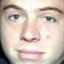

In [34]:
img11 = img11.resize((64,64))
img11

In [35]:

img11 = img11.convert("L")

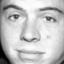

In [36]:
img11

In [37]:
img11 = np.array(img11)
scaleimg = img11.flatten().reshape(1, -1) 
scaleimg = scaler.transform(scaleimg)  


In [38]:
prediction = model.predict(scaleimg)
prediction 

array([0])

In [39]:
print(f"Training Accuracy: {model.score(xtrainscale, ytrain):.4f}")
print(f"Test Accuracy: {model.score(xtestscale, ytest):.4f}")

Training Accuracy: 1.0000
Test Accuracy: 0.8809


In [40]:
import pickle

In [41]:
pickle.dump(model,open("model.pkl","wb"))

In [42]:
pickle.dump(scaler,open("scaler.pkl","wb"))
